In [1]:
!wget https://bit.ly/fruits_300 -data -o fruits_300.npy

Setting --append-output (logfile) to ta
Setting --append-output (logfile) to ta
Setting --output-file (logfile) to fruits_300.npy
Setting --output-file (logfile) to fruits_300.npy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fruits = np.load("fruits_300")

In [ ]:
# pwd

In [6]:
fruits = np.load("/content/fruits_300",allow_pickle=True)

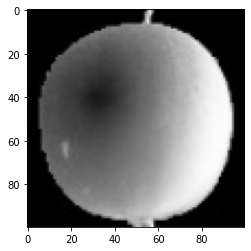

In [7]:
plt.imshow(fruits[0],cmap="gray");

In [8]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


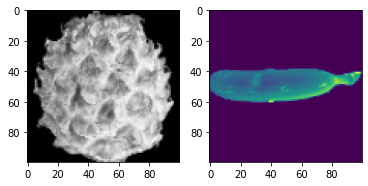

In [10]:
fig,axes = plt.subplots(1,2)
axes[0].imshow(fruits[100],cmap="gray")
axes[1].imshow(fruits[200]);

futis300 데이터의 처음 100개는 사과, 그 다음 100개는 파인애플, 마지막 100개는 바나나이다.

reshape 메서드를 이용해 두번째 차원과 세번째 차원을 10000으로(100*100)합친다.

In [13]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

numpy에서 axis=0이면 세로로, axis=1이면 가로로

In [14]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


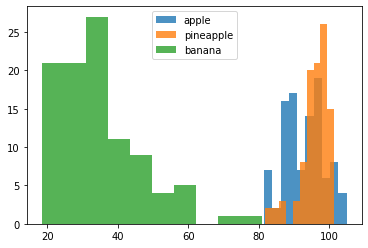

In [15]:
plt.hist(np.mean(apple,axis=1),alpha=0.8)
plt.hist(np.mean(pineapple,axis=1),alpha=0.8)
plt.hist(np.mean(banana,axis=1),alpha=0.8)
plt.legend(["apple","pineapple","banana"])
plt.show()


사과,파인애플,바나나 100개의 픽셀 10000개에 대한 평균값을 막대그래프로 나타낸다

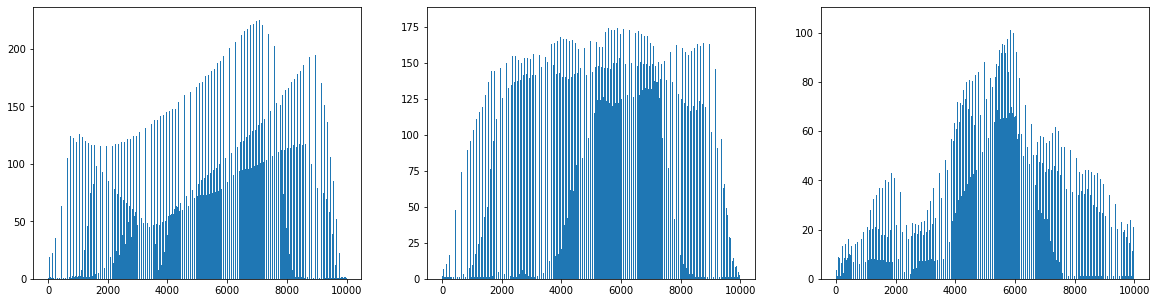

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

100*100의 1차원으로 펼쳤던 데이터를 다시 100*100으로 만든 후 합쳐서 보여주기

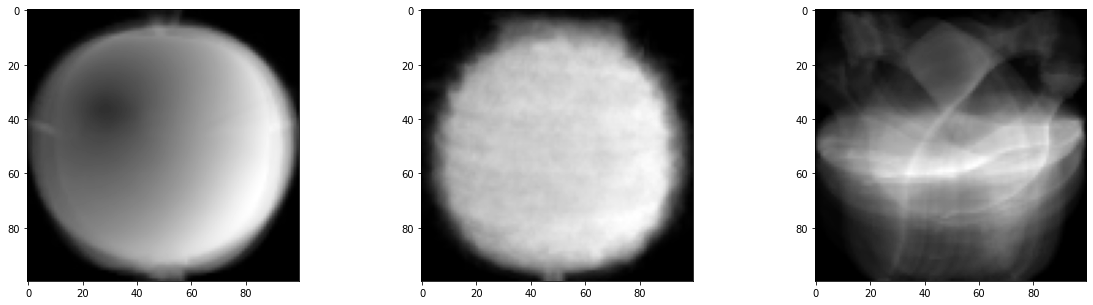

In [18]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray')
axs[1].imshow(pineapple_mean, cmap='gray')
axs[2].imshow(banana_mean, cmap='gray')
plt.show()

평균값과 가까운 사진 고르기

In [22]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)    # 크기가 300인 1차원 배열(1행 300열)

(300,)


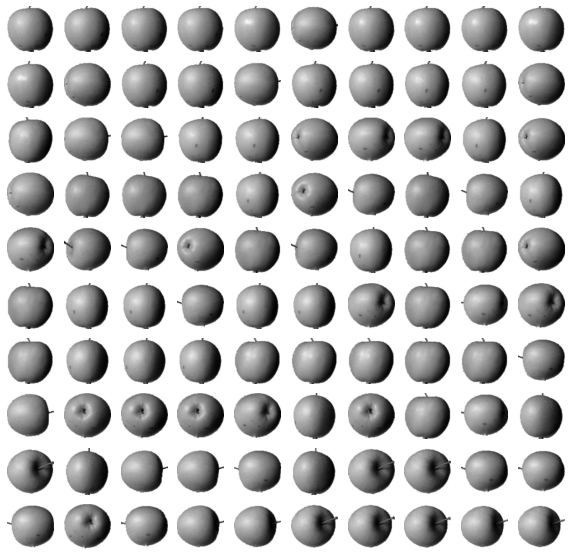

In [21]:
# np.argsort()함수는 작은 것에서 큰 순서대로 나열한 abs_mean배열의 인덱스를 반환
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

(300,)


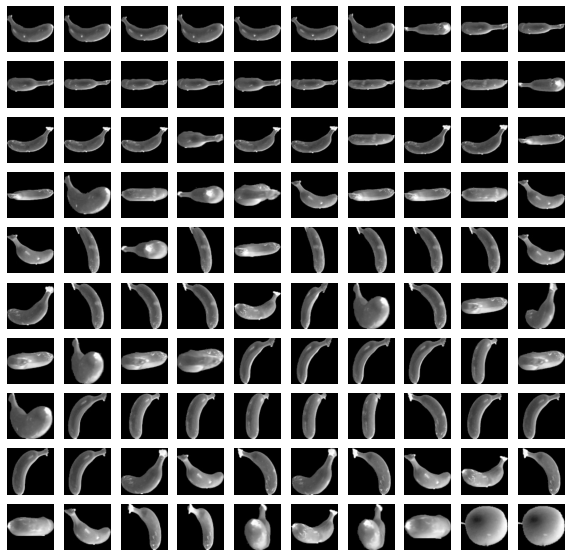

In [23]:
b_abs_diff = np.abs(fruits - banana_mean)
b_abs_mean = np.mean(b_abs_diff, axis=(1,2))
print(b_abs_mean.shape)    # 크기가 300인 1차원 배열(1행 300열)

banana_index = np.argsort(b_abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray')
        axs[i, j].axis('off')
plt.show()